<a href="https://colab.research.google.com/github/fasterased/Games_analytics/blob/main/Game_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode
sns.set(rc={'figure.figsize':(16,6)}, style='whitegrid')

In [ ]:
games = pd.read_csv('/content/[SW.BAND] 1 games (1).csv')
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
games.dtypes

,0
Rank,int64
Name,object
Platform,object
Year,float64
Genre,object
Publisher,object
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64


In [ ]:
games.shape

(16598, 11)

In [ ]:
games.isna().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
games.dropna(inplace=True)

In [ ]:
games.shape

(16291, 11)

In [ ]:
games.Year = games.Year.astype(int)

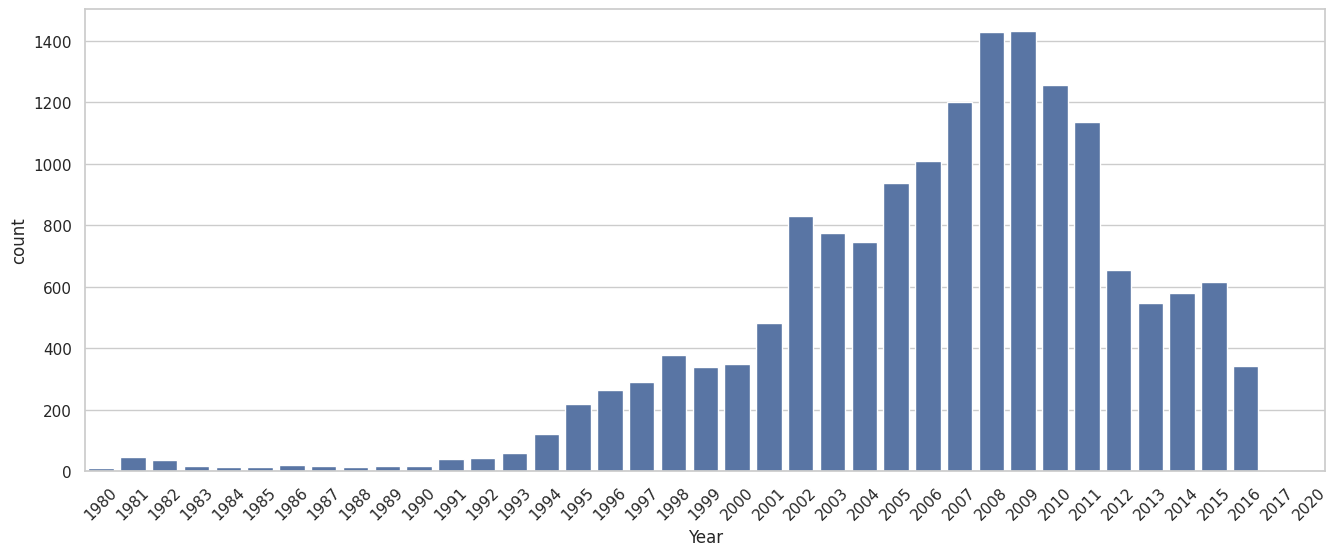

In [ ]:
sns.countplot(x = games.Year)
plt.xticks(rotation=45)
plt.show()

In [ ]:
games.query('Year <= 2007').shape[0]/16291,games.query('Year > 2007').shape[0]/16291

(0.5093609968694371, 0.4906390031305629)

In [ ]:
games.Year.describe()

,Year
count,16291.000000
mean,2006.405561
std,5.832412
min,1980.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2020.000000


In [ ]:
platforms = games.Platform.value_counts(normalize=True).mul(100).to_frame('pct')
platforms.head()

,pct
Platform,
DS,13.080842
PS2,13.056289
PS3,8.004420
Wii,7.918483
X360,7.574735


In [ ]:
platforms.query('pct > 7').index.to_list()

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

In [ ]:
games.Publisher.value_counts().head()

,count
Publisher,
Electronic Arts,1339
Activision,966
Namco Bandai Games,928
Ubisoft,918
Konami Digital Entertainment,823


In [ ]:
games[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].agg(['mean', 'median', 'std'])

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
mean,0.265647,0.147731,0.078833,0.048426,0.540910
median,0.080000,0.020000,0.000000,0.010000,0.170000
std,0.822432,0.509303,0.311879,0.190083,1.567345


<Axes: xlabel='Genre', ylabel='JP_Sales'>

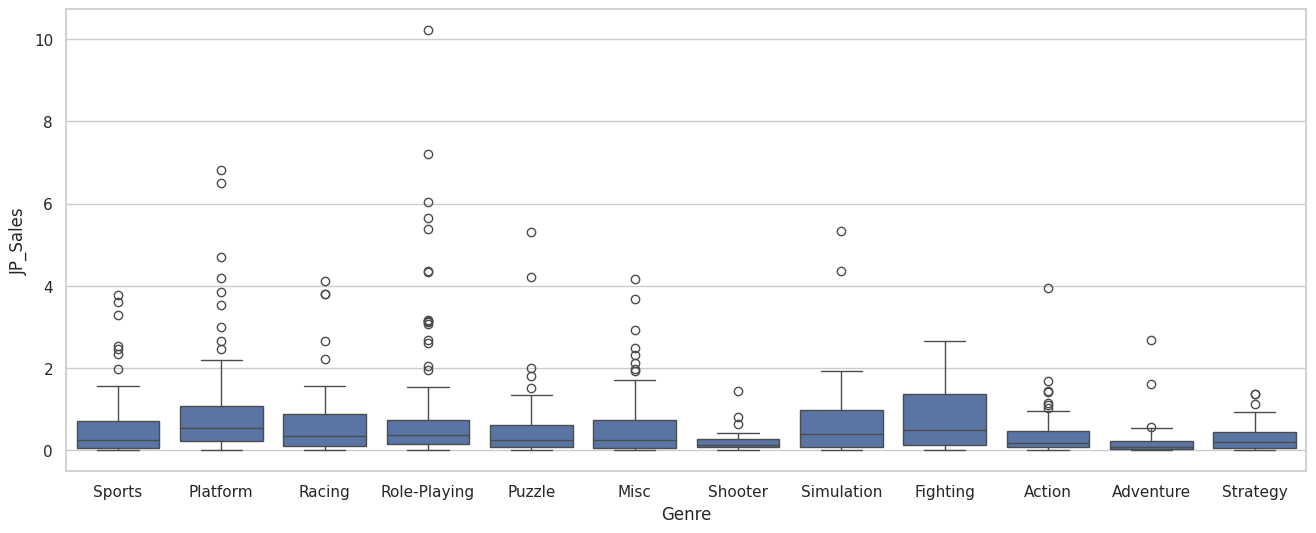

In [ ]:
sns.boxplot(data = games.query("Publisher == 'Nintendo'"), x = 'Genre', y = 'JP_Sales')

In [ ]:
games.query("Publisher == 'Nintendo' and Genre in ['Simulation', 'Fighting']").groupby('Genre').agg({'JP_Sales':'mean'})

,JP_Sales
Genre,
Fighting,0.830000
Simulation,0.844643


In [ ]:
df = games.query("Publisher == 'Nintendo' and Genre in ['Simulation', 'Fighting', 'Platform','Racing', 'Sports']").groupby(['Genre','Year']).Global_Sales.sum().reset_index()
df

,Genre,Year,Global_Sales
0,Fighting,1987,5.42
1,Fighting,1993,2.00
2,Fighting,1995,3.20
3,Fighting,1996,0.99
4,Fighting,1999,5.55
...,...,...,...
109,Sports,2010,2.18
110,Sports,2012,1.05
111,Sports,2013,1.69
112,Sports,2014,0.88


<Axes: xlabel='Year', ylabel='Global_Sales'>

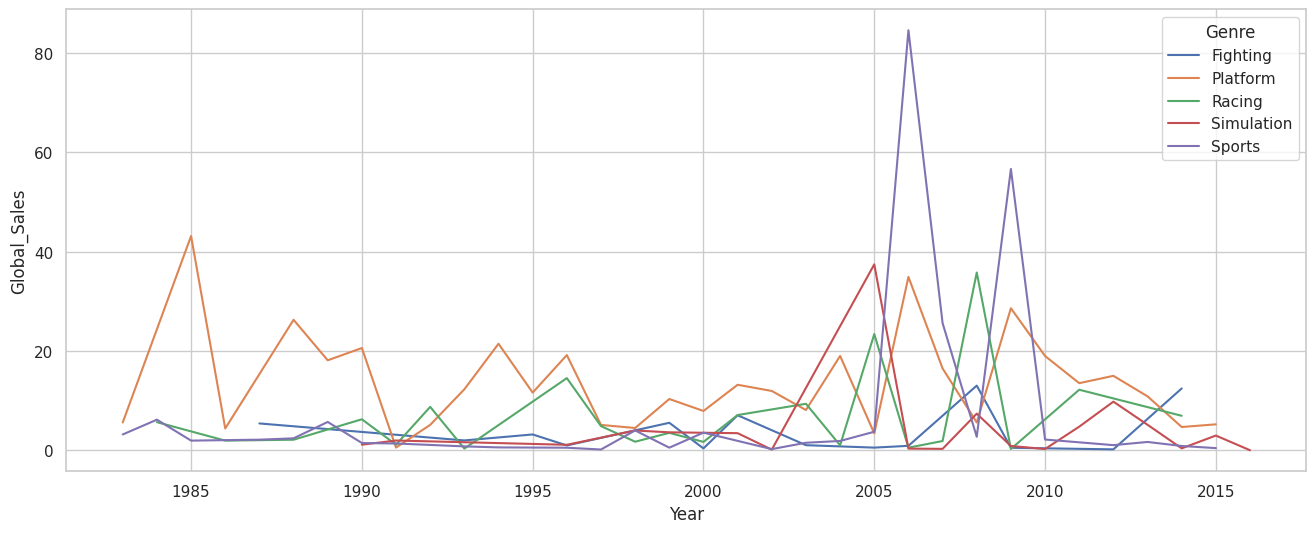

In [ ]:
sns.lineplot(data = df, x = 'Year', y = 'Global_Sales', hue = 'Genre')